In [59]:
import math
import numpy as np
import pandas as pd
from scipy.stats import norm 
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [60]:
def blackScholes(spotPrice, strikePrice, time, riskFreeRate, volatility):
    d1 = (np.log(spotPrice/strikePrice) + (riskFreeRate + (volatility**2)/2)*time)/(volatility*np.sqrt(time))
    d2 = d1 - volatility*np.sqrt(time)
    estimate = spotPrice * norm.cdf(d1) - strikePrice*np.exp(-riskFreeRate*time)*norm.cdf(d2)
    return estimate

In [4]:
tsla_stocks = pd.read_csv("TSLA.csv")
msft_stocks = pd.read_csv("MSFT.csv")

tsla_stocks['Date']= pd.to_datetime(tsla_stocks['Date'])
msft_stocks['Date']= pd.to_datetime(msft_stocks['Date'])

In [5]:
msft_stocks = msft_stocks.drop(msft_stocks[msft_stocks.Date < "2018-01-01"].index).reset_index(drop=True)
msft_stocks = msft_stocks.drop(msft_stocks[msft_stocks.Date > "2019-01-01"].index).reset_index(drop=True)

tsla_stocks = tsla_stocks.drop(tsla_stocks[tsla_stocks.Date < "2018-01-01"].index).reset_index(drop=True)
tsla_stocks = tsla_stocks.drop(tsla_stocks[tsla_stocks.Date > "2019-01-01"].index).reset_index(drop=True)

In [6]:
#find daily risk free rate given annual risk free rates, for 2018

tsla_sigma_daily = 36.08/(np.sqrt(252)*100)
msft_sigma_daily = 24.88/(np.sqrt(252)*100)

print(msft_sigma_daily)


0.015672926814115955


In [67]:
#set predicted black scholes price, for spot price = open, and strike price = 100 and 63 for microsoft and tesla repspectively

msft_stocks['black_scholes_price'] = msft_stocks.apply(lambda x: blackScholes(x['Open'], 100, 50, .05, msft_sigma_daily), axis=1)
tsla_stocks['black_scholes_price'] = tsla_stocks.apply(lambda x: blackScholes(x['Open'], 63, 50, .05, tsla_sigma_daily), axis=1)


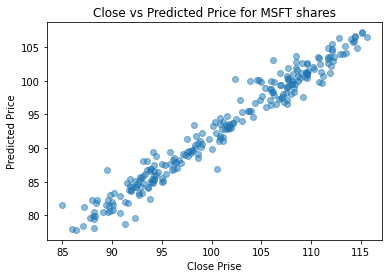

In [72]:
plt.scatter(msft_stocks['Close'], msft_stocks['black_scholes_price'], alpha=0.5)
plt.title("Close vs Predicted Price for MSFT shares")
plt.xlabel("Close Prise")
plt.ylabel("Predicted Price")
plt.show()

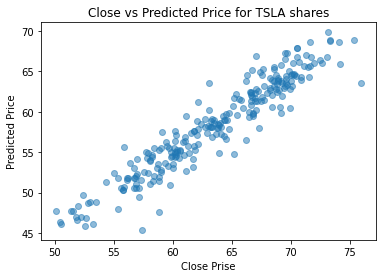

In [73]:
#note: TSLA has more historical variance than microsoft.
plt.scatter(tsla_stocks['Close'], tsla_stocks['black_scholes_price'], alpha=0.5)
plt.title("Close vs Predicted Price for TSLA shares")
plt.xlabel("Close Prise")
plt.ylabel("Predicted Price")
plt.show()